<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')


<IPython.core.display.Javascript object>

### Importing the necessary libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
#for graphs
import matplotlib.pyplot as plt
import seaborn as sns
#for splitting data
from sklearn.model_selection import train_test_split
#For scaling
from sklearn.preprocessing import StandardScaler
#for building the model
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
#statsmodel
import statsmodels.api as sm  
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
#for R2 
from sklearn.metrics import r2_score

# Step1 Reading and understanding data


Reading the data from the file day.csv

In [3]:
df = pd.read_csv("day.csv")

Inspecting the data frame

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


###### Observation
The data frame has 15 columns, 730 non null records,one column that has object data type. 
Next we will look at the statistical details of the data

In [6]:
df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
unique,NaN,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,21-05-2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,365.500000,NaN,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,NaN,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,NaN,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000


Converting the column dteday to a date format in pandas. There are some categorical data that appear as numerical data. These will be handled below

In [7]:
df.dteday=pd.to_datetime(df.dteday)

In [8]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [10]:
df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
unique,NaN,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2019-10-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2019-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,365.500000,NaN,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,NaN,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000


### Converting the season, month, year, holiday  and weathersit columns to categorical data

In [11]:
#function to convert into categorical data
def categories_season(x):
    d={1:"spring", 2:"summer", 3:"fall", 4:"winter"}
    return d[x]

df.season =df.season.apply(categories_season)

In [12]:
df.season.describe()

count      730
unique       4
top       fall
freq       188
Name: season, dtype: object

In [13]:
df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [14]:
#function to convert into categorical data
def categories_weather(x):
    d= {1:"Clear",2:"Misty",3:"Rainy",4:"Stormy"}
    return d[x]
df.weathersit = df.weathersit.apply(categories_weather)

In [15]:
df.weathersit.describe()

count       730
unique        3
top       Clear
freq        463
Name: weathersit, dtype: object

In [16]:
#function to convert into categorical data
def categories_month(x):
    d={1:"Jan", 2:"Feb", 3:"Mar", 4:"April",5:"May",6:"June",7:"July",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}
    return d[x]

df.mnth =df.mnth.apply(categories_month)

In [17]:
#function to convert into categorical data
def categories_day(x):
    d={0:"Sun",1:"Mon", 2:"Tue", 3:"Wed", 4:"Thurs",5:"Fri",6:"Sat"}
    return d[x]

df.weekday =df.weekday.apply(categories_day)

In [18]:
#function to convert into categorical data
def categories_year(x):
    d={0:"2018",1:"2019"}
    return d[x]
df.yr = df.yr.apply(categories_year)

In [19]:
#function to convert into categorical data
def categories_holiday(x):
    d={0:"No",1:"Yes"}
    return d[x]
df.holiday = df.holiday.apply(categories_holiday)

In [20]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,Jan,No,Mon,1,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,2018,Jan,No,Tue,1,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,2018,Jan,No,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,2018,Jan,No,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,2018,Jan,No,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [21]:
#function to convert into categorical data
def categories_workingday(x):
    d={0:"No",1:"Yes"}
    return d[x]
df.workingday = df.workingday.apply(categories_workingday)

In [22]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,Jan,No,Mon,Yes,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,2018,Jan,No,Tue,Yes,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,2018,Jan,No,Wed,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,2018,Jan,No,Thurs,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,2018,Jan,No,Fri,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [23]:
df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730,730,730,730,730,730,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
unique,NaN,730,4,2,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2019-10-25 00:00:00,fall,2018,July,No,Tue,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,365,62,709,105,504,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2019-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,365.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000


# Step2 Visualizing data

In [24]:
df.describe()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [25]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### Assumption 1 of Linear Regression -linear relationship of dependent variable with independent variables.
Checking for linear relationship of dependent variable cnt with other independent variables

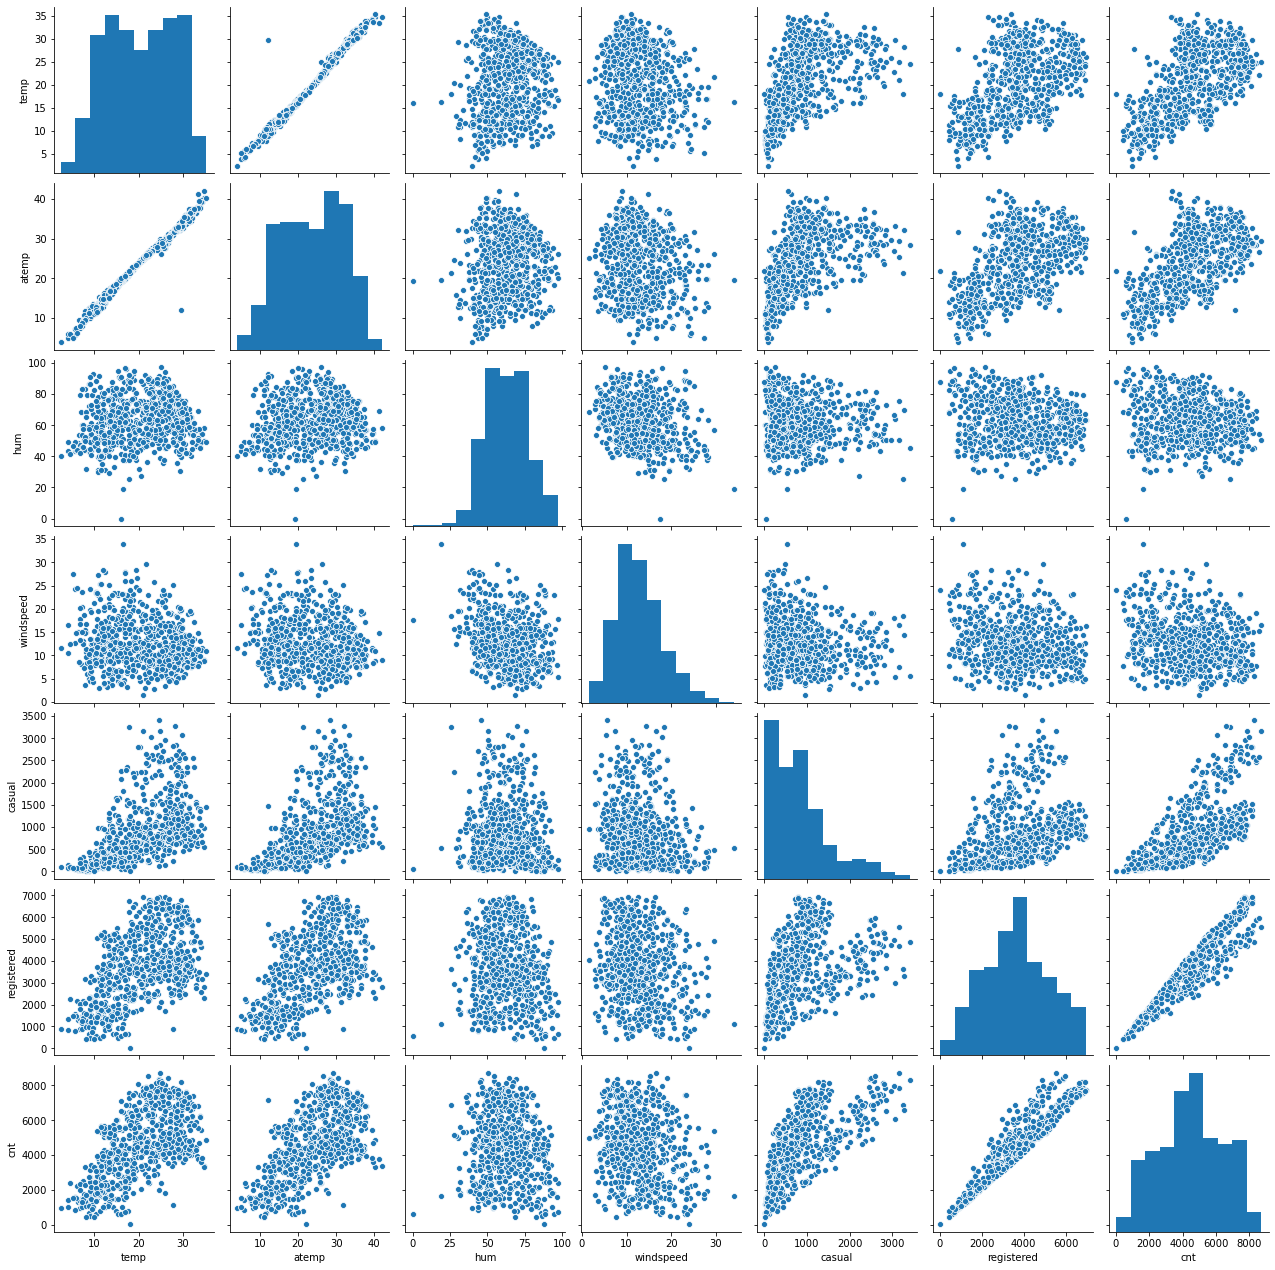

In [26]:
#Checking for linear relationship of dependent variable cnt with other independent variables
num_vars= ['temp', 'atemp', 'hum', 'windspeed','casual', 'registered', 'cnt']
sns.pairplot(df[num_vars])

##### Observation 
There are a few independent variables like temp and atemp showing linear relationship with cnt.higgh correlation between some features like atemp and temp are noticed. Casual and registered also have high correlation with cnt.

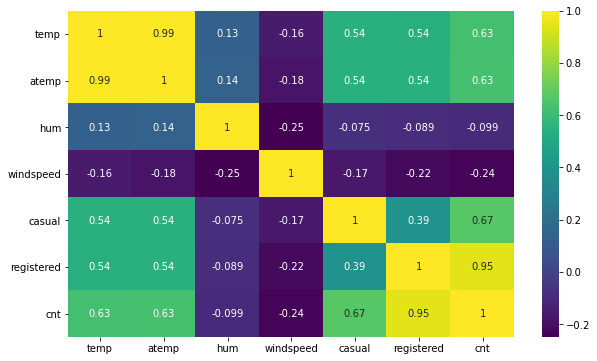

In [27]:
#Checking the correllation for numeical variables
num_vars= ['temp', 'atemp', 'hum', 'windspeed','casual', 'registered', 'cnt']
plt.figure(figsize=(10,6))
sns.heatmap(df[num_vars].corr(),annot =True, cmap="viridis")

###### Observation
The column count is highly corelated to the registered value indicating that the maximum number of users are registered followed by the casual users. The temperature seems to be having a correlation  of 0.63.
Temperature and ambient temperature have a high correlation which is intutive.One of them can be dropped to avoid multicollinearity.

The categorical variables are now inspected with the help of box plots.

In [28]:
df.select_dtypes(include=['object']).columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

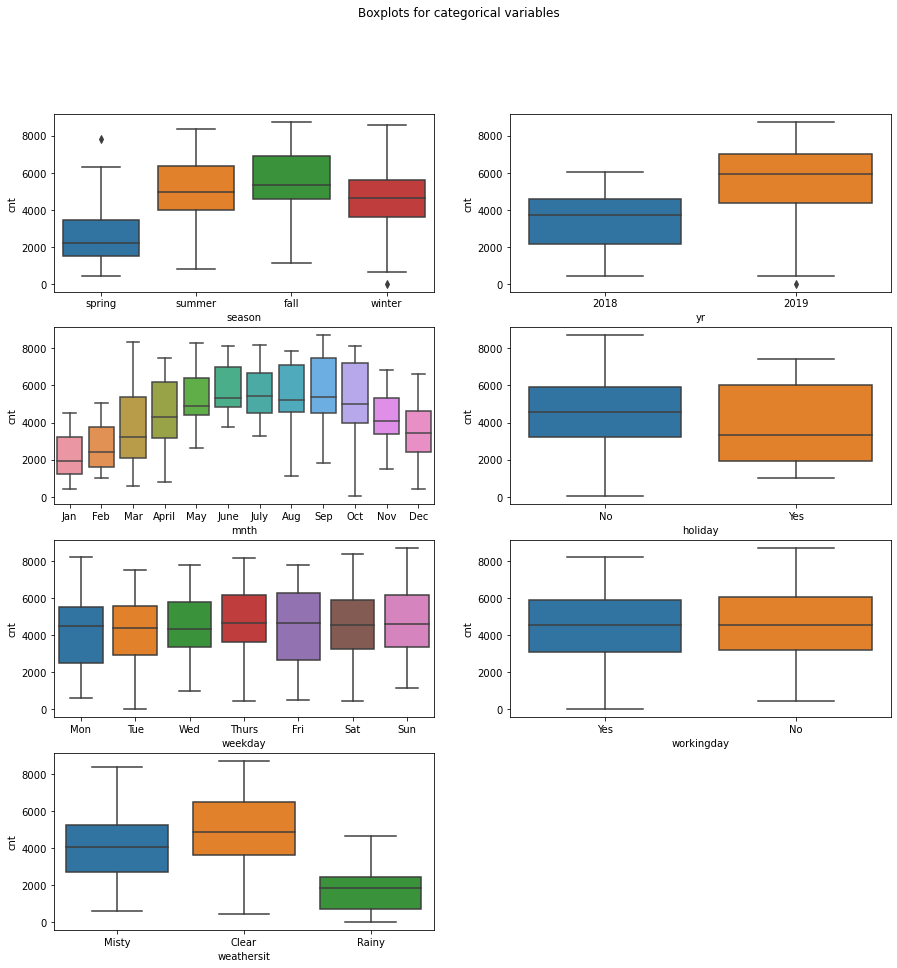

In [29]:
#Plotting the categorical variables
# cat_vars=['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit']
cat_vars=df.select_dtypes(include=['object']).columns
plt.figure(figsize=(15,15))
plt.suptitle("Boxplots for categorical variables",size="12")
for col,i in zip(cat_vars,range(1,len(cat_vars)+1)):
    plt.subplot(4,2,i)
    sns.boxplot(x=col,y="cnt",data=df)
plt.show()

###### Observation
The above box plots and bar plots are inspected and the observations are as below.

1. The first boxplot and bar graph shows season vs count. Fall seems to be having a higher number of riders followed by summer. There are a few outliers for spring.
2. The second box and bar plot shows the year 2019 denoted by 1 has a higher number compared to 2018 suggecting a growth in the number of riders.
3. Month 6-9 seems to be having the highest number of riders. Followed by month 10 with long whiskers indicating high data spread. 
4. The bar graph shows the total count of riders for non-holidays is high compared to holidays ,but the count of riders on holidays is high.
5. The week day does not show a very significant impact however the weekend number seems to be a little high.
6. Working days seem to attract more riders than on non working days. This could be correlated to the holiday column.
7. Clear weather attracts a lot of riders. There are no riders on stormy days.

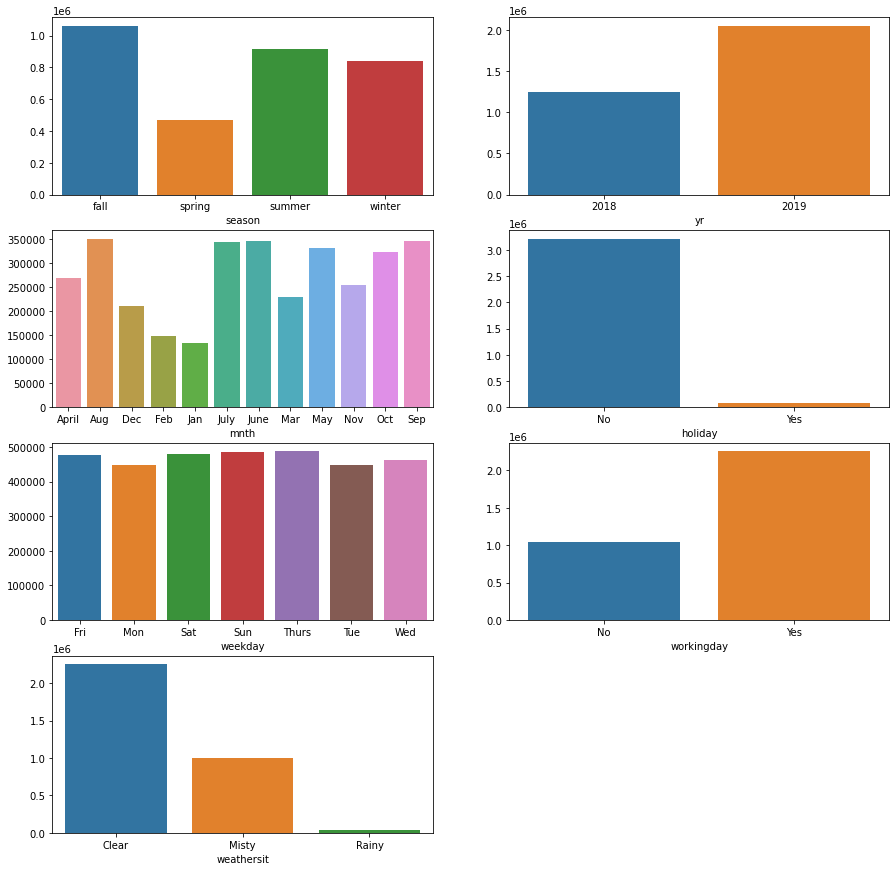

In [30]:
cat_vars=['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit']
plt.figure(figsize=(15,15))
for col,i in zip(cat_vars,range(1,len(cat_vars)+1)):
    plt.subplot(4,2,i)
    res =df.groupby(by=col)["cnt"].sum()
    sns.barplot(x = res.index, y = res.values)

###### Observation
The above box plots and bar plots are inspected and the observations are as below.

1. The first boxplot and bar graph shows season vs count. Fall seems to be having a higher number of riders followed by summer. There are a few outliers for spring.
2. The second box and bar plot shows the year 2019 denoted by 1 has a higher number compared to 2018 suggecting a growth in the number of riders.
3. Month 6-9 seems to be having the highest number of riders. Followed by month 10 with long whiskers indicating high data spread. 
4. The bar graph shows the total count of riders for non-holidays is high compared to holidays ,but the count of riders on holidays is high.
5. The week day does not show a very significant impact however the weekend number seems to be a little high.
6. Working days seem to attract more riders than on non working days. This could be correlated to the holiday column.
7. Clear weather attracts a lot of riders. There are no riders on stormy days.

# Step 3 Data Preparation

The categorical columns seasons,holiday,weekday,yr , month and weather_sit can be converted to integers using dummy variables

In [31]:
cat_vars=df.select_dtypes(include=['object']).columns
dummies = pd.get_dummies(df[cat_vars],drop_first=True)

In [32]:
dummies

,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,workingday_Yes,weathersit_Misty,weathersit_Rainy
0,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
726,1,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
727,1,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [33]:
df= df.drop(cat_vars, axis=1)

In [34]:
#concating all dummy variables
df = pd.concat([df,dummies],axis=1)

In [35]:
df.head()

,instant,dteday,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,workingday_Yes,weathersit_Misty,weathersit_Rainy
0,1,2018-01-01,14.110847,18.18125,80.5833,10.749882,331,654,985,1,...,0,1,0,0,0,0,0,1,1,0
1,2,2018-02-01,14.902598,17.68695,69.6087,16.652113,131,670,801,1,...,0,0,0,0,0,1,0,1,1,0
2,3,2018-03-01,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,...,0,0,0,0,0,0,1,1,0,0
3,4,2018-04-01,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,...,0,0,0,0,1,0,0,1,0,0
4,5,2018-05-01,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,...,0,0,0,0,0,0,0,1,0,0


##### Dropping the below variables:
    1. dteday: cannot find any relation that could help in building a story about the model since holiday weekday weekend etc are already catptured.
    2. casual,registered: these are highly corelated with cnt target variable.It will be dropped
    3. instant is an index hence can be dropped.
    4. Temp and atemp are highly corelated.atemp is dropped.

In [36]:
#dropping these columns to clean up the data set
df.drop(["dteday","casual","registered","instant","atemp"],axis=1,inplace=True)

In [37]:
df.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,workingday_Yes,weathersit_Misty,weathersit_Rainy
0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
2,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Step 4: Splitting the Data into Training and Testing Sets

In [38]:
#Spliiting the data with train_test_split from sklearn module
df_train,df_test =train_test_split(df, train_size = 0.7, random_state = 100)

# Step 5: Rescaling the Features
The numerical features are scaled using the StandardScaler

In [39]:
#Creating an instance of the scaler
scaler=StandardScaler()


In [40]:
#transforming the numerical variables
num_vars= ['temp', 'hum', 'windspeed']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [41]:
df.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,workingday_Yes,weathersit_Misty,weathersit_Rainy
0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
2,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


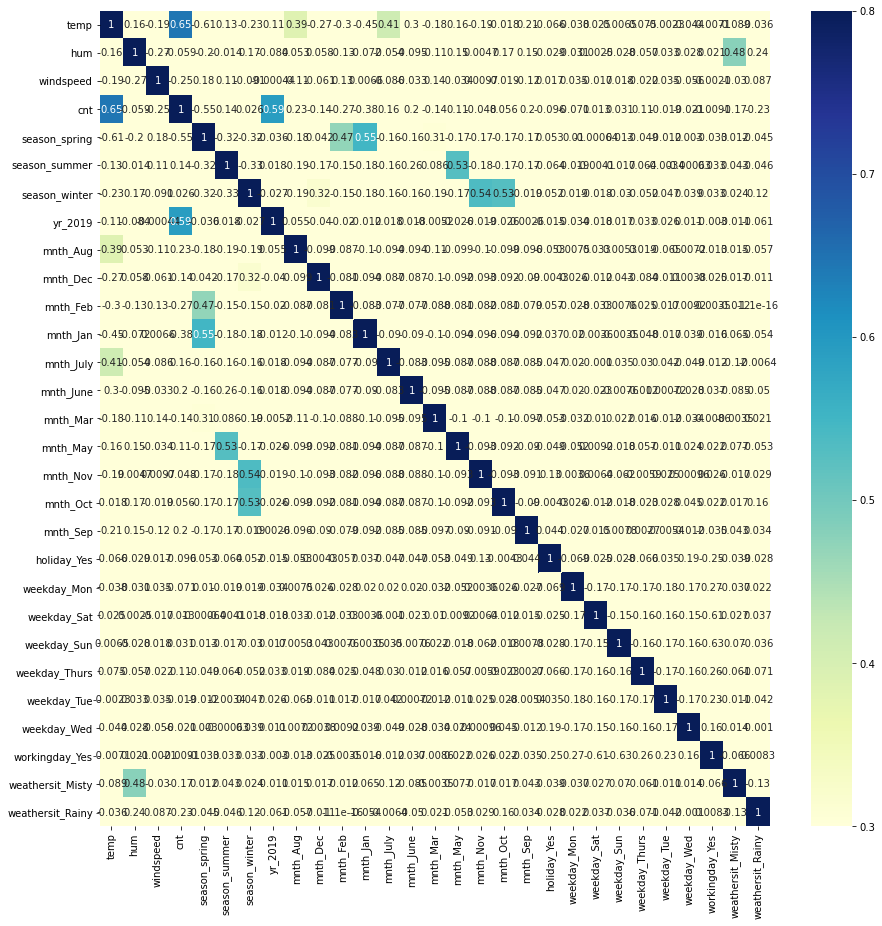

In [42]:
plt.figure(figsize=(15,15))
res=df_train.corr()
# res=res[abs(res)>0.3]
sns.heatmap(res,annot=True, cmap='YlGnBu',vmin=0.3,vmax=.8)

# Step 6: Dividing into X and Y sets for the model building

In [43]:
y_train = df_train.pop("cnt")

In [44]:
X_train=df_train


In [45]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   temp              510 non-null    float64
 1   hum               510 non-null    float64
 2   windspeed         510 non-null    float64
 3   season_spring     510 non-null    uint8  
 4   season_summer     510 non-null    uint8  
 5   season_winter     510 non-null    uint8  
 6   yr_2019           510 non-null    uint8  
 7   mnth_Aug          510 non-null    uint8  
 8   mnth_Dec          510 non-null    uint8  
 9   mnth_Feb          510 non-null    uint8  
 10  mnth_Jan          510 non-null    uint8  
 11  mnth_July         510 non-null    uint8  
 12  mnth_June         510 non-null    uint8  
 13  mnth_Mar          510 non-null    uint8  
 14  mnth_May          510 non-null    uint8  
 15  mnth_Nov          510 non-null    uint8  
 16  mnth_Oct          510 non-null    uint8  


# Step 7: Building a model with RFE

In [46]:
#creating an instance of Linear Regression module
lm=LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [47]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', False, 12),
 ('windspeed', False, 6),
 ('season_spring', True, 1),
 ('season_summer', False, 5),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 14),
 ('mnth_Dec', False, 2),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', False, 3),
 ('mnth_July', True, 1),
 ('mnth_June', False, 16),
 ('mnth_Mar', False, 19),
 ('mnth_May', False, 13),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 17),
 ('mnth_Sep', True, 1),
 ('holiday_Yes', True, 1),
 ('weekday_Mon', False, 11),
 ('weekday_Sat', False, 8),
 ('weekday_Sun', False, 9),
 ('weekday_Thurs', False, 18),
 ('weekday_Tue', False, 10),
 ('weekday_Wed', False, 15),
 ('workingday_Yes', False, 7),
 ('weathersit_Misty', True, 1),
 ('weathersit_Rainy', True, 1)]

In [48]:
#Columns not considered significant by RFE
X_train.columns[~rfe.support_]

Index(['hum', 'windspeed', 'season_summer', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_June', 'mnth_Mar', 'mnth_May', 'mnth_Oct',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thurs',
       'weekday_Tue', 'weekday_Wed', 'workingday_Yes'],
      dtype='object')

In [49]:
#Columns considered significant by RFE
col = X_train.columns[rfe.support_]
col

Index(['temp', 'season_spring', 'season_winter', 'yr_2019', 'mnth_July',
       'mnth_Nov', 'mnth_Sep', 'holiday_Yes', 'weathersit_Misty',
       'weathersit_Rainy'],
      dtype='object')

# Step 8 Model1 Building the model using statsmodel, using the detailed statistics

In [50]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [51]:
#add constant to Xtrain
X_train_rfe = sm.add_constant(X_train_rfe)

In [52]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [53]:
#Seeing the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     231.8
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          2.18e-180
Time:                        19:13:44   Log-Likelihood:                -4145.5
No. Observations:                 510   AIC:                             8313.
Df Residuals:                     499   BIC:                             8360.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3923.0720     83.122  

# Step 9 Calculate the VIFs for model 1

In [54]:
#dropping the const before calculating the vif
X_train_rfe =X_train_rfe.drop("const", axis=1)

In [55]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,2.44
1,season_spring,2.22
2,season_winter,2.03
3,yr_2019,1.67
5,mnth_Nov,1.59
8,weathersit_Misty,1.36
4,mnth_July,1.34
6,mnth_Sep,1.17
7,holiday_Yes,1.06
9,weathersit_Rainy,1.06


##### Analysis
R-squared: is high and so is Adj. R-squared:. F value is high and Prob(F) is low which says the model is a good fit. The features season_spring and weathersit_Rainy have a high -ve coeff showing they play an imporant role in the model . Highest p-value for the features is mnth_Nov of .0.096 saying it may not be that important and the heat map shows correlation with season_winter hence below we will try dropping the feature mnth_Nov

# Step 8 Model2 Building the model using statsmodel, using the detailed statistics

In [56]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe2 = X_train_rfe.drop("mnth_Nov",axis=1)

#add constant to Xtrain
X_train_rfe2 = sm.add_constant(X_train_rfe2)

lm2 = sm.OLS(y_train,X_train_rfe2).fit()   # Running the linear model

#Seeing the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.3
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          5.25e-181
Time:                        19:13:44   Log-Likelihood:                -4146.9
No. Observations:                 510   AIC:                             8314.
Df Residuals:                     500   BIC:                             8356.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3911.6493     82.985  

# Step 9 Calculate the VIFs for model 2

In [57]:
X_train_rfe2 =X_train_rfe2.drop("const", axis=1)

In [58]:
# Step 9 Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,2.42
1,season_spring,2.21
3,yr_2019,1.66
2,season_winter,1.55
7,weathersit_Misty,1.36
4,mnth_July,1.34
5,mnth_Sep,1.16
8,weathersit_Rainy,1.05
6,holiday_Yes,1.04


##### Analysis
R-squared and  Adj. R-squared dont change significantly after dropping mnth_Nov. F value is high and Prob(F) is low which says the model is a good fit. The features season_spring and weathersit_Rainy remain with a high -ve coeff showing they play an imporant role in the model. The p-value for the all the features is 0. However to make the model simpler with fewer variables among the two seasons, season_spring and season_winter we drop season_winter since the coefficient is lower. 

# Step 8 Model3 Building the model using statsmodel, using the detailed statistics

In [59]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe3 = X_train_rfe2.drop("season_winter",axis=1)

#add constant to Xtrain
X_train_rfe3 = sm.add_constant(X_train_rfe3)

lm3 = sm.OLS(y_train,X_train_rfe3).fit()   # Running the linear model

#Seeing the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     277.0
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.71e-178
Time:                        19:13:44   Log-Likelihood:                -4155.8
No. Observations:                 510   AIC:                             8330.
Df Residuals:                     501   BIC:                             8368.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4104.8706     70.179  

# Step 9 Calculate the VIFs for model 3

In [60]:
X_train_rfe3 =X_train_rfe3.drop("const", axis=1)

In [61]:
# Step 9 Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,2.00
1,season_spring,1.84
2,yr_2019,1.44
3,mnth_July,1.32
6,weathersit_Misty,1.28
4,mnth_Sep,1.15
5,holiday_Yes,1.03
7,weathersit_Rainy,1.02


##### Analysis
R-squared and  Adj. R-squared dont change significantly after dropping season_winter. F value is high and Prob(F) is low which says the model is a good fit. Highest p-value for the features is holiday_Yes of .001 since this is not too high a pvalue and the feature may give a lot of meaning in making business decisons it can be retained. mnth_July has acorrelation with temp hence it is better to drop one of them. The feature mnth_July is dropped

# Step 8 Model4 Building the model using statsmodel, using the detailed statistics

In [62]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe4 = X_train_rfe3.drop("mnth_July",axis=1)

#add constant to Xtrain
X_train_rfe4 = sm.add_constant(X_train_rfe4)

lm4 = sm.OLS(y_train,X_train_rfe4).fit()   # Running the linear model

#Seeing the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     306.3
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.13e-176
Time:                        19:13:44   Log-Likelihood:                -4163.0
No. Observations:                 510   AIC:                             8342.
Df Residuals:                     502   BIC:                             8376.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4049.3832     69.555  

# Step 9 Calculate the VIFs for model 4

In [63]:
X_train_rfe4 =X_train_rfe4.drop("const", axis=1)

In [64]:
# Step 9 Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,season_spring,1.76
0,temp,1.59
2,yr_2019,1.42
5,weathersit_Misty,1.28
3,mnth_Sep,1.12
4,holiday_Yes,1.03
6,weathersit_Rainy,1.02


##### Analysis
R-squared and  Adj. R-squared dont change significantly after dropping mnth_July. F value is high and Prob(F) is low which says the model is a good fit. Highest p-value for the features is holiday_Yes of .001 . Instead of removing holiday_Yes we try retaining it to hel explain the model in terms of business.

# Model Explanation
The model can now be mathematically represented as 

cnt = 4049.3832 + 701.6055 x temp -1365.3764 x season_spring + 2047.0312 x yr_2019 +664.0239 x mnth_Sep -800.2150 x holiday_Yes  -665.8691 x weathersit_Misty -2544.4696 x weathersit_Rainy 

This could be interpreted as for a unit change in temp keeping every other independent variable constant we could se a raise of 701.6 change in target variable count. This can be said for every other independent variable in the equation.

The most important features are weather situation especially rainy, the year feature indicates the business is growing, faeture season especially spring palys an important role.

The features that positively impact the count of bikers are temp, mnth_Sep, and those that affect negatively are season_spring, holiday_Yes, weathersit_Misty and weathersit_Rainy. The feature yr_2019 could be interpreted as the business is growing form last year. 

In terms of business the bikers increase in number in the month of september, when the temperature is not cold, and decrease when it is rainy, misty or  a holiday, 



# Step 10 Residual Analysis of the train data

### Assumption 2 of Linear Regression - Normality assumption, Zero mean assumption

Inspecting Distribution of the error terms

In [67]:
#prediction using the final model
#add constant to Xtrain
X_train_rfe4 = sm.add_constant(X_train_rfe4)
y_train_pred = lm4.predict(X_train_rfe4)
y_train_pred

576    6959.999732
426    3769.626253
728    3822.025366
482    4989.707739
111    2787.695254
          ...     
578    7111.753491
53     1642.895861
350    2484.187737
79     3151.002283
520    5625.774007
Length: 510, dtype: float64

Text(0.5, 0, 'y_train - y_train_pred')

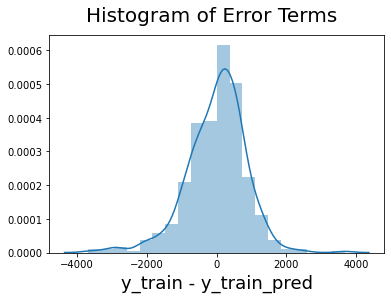

In [68]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Histogram of Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 18)     

#####  Observation 
The error terms are distributed  normally. Thus satisfying the assumpton of Linear Regression.
Furthermore the mean is at 0.

<Figure size 432x288 with 0 Axes>

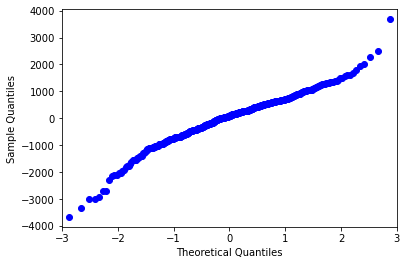

In [69]:
# Plot the QQ plot of the error terms against a standard normal distribution
fig = plt.figure()
sm.qqplot(lm4.resid)
fig.suptitle('Histogram of Error Terms', fontsize = 20);                  # Plot heading 
plt.show();

##### Observation
The error terms are seen as arough straight line hence are distributed normally. Thus satisfying the assumpton of Linear Regression.

### Assumption 3 of Linear Regression - Independent Error assumption, Constant Variance assumption
Inspecting error terms for constant variance and independent of each other

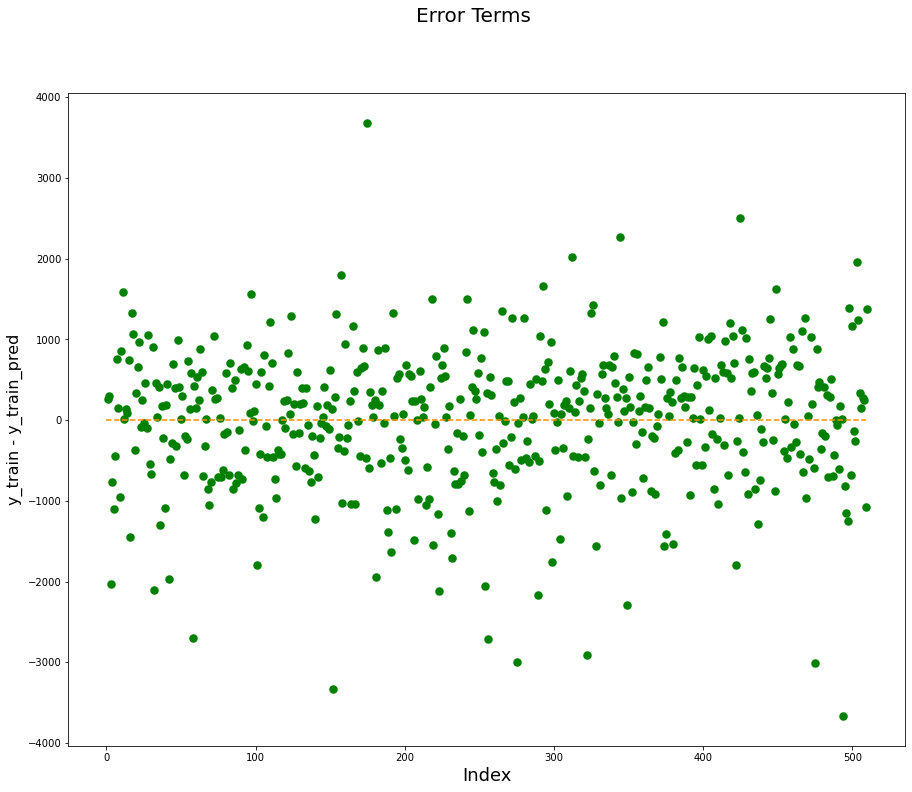

In [70]:
# Error terms
c = [i for i in range(1,y_train.shape[0]+1,1)]
fig = plt.figure(figsize=(15,12))
plt.scatter(c,y_train-y_train_pred, color="green", linewidth=2.5, linestyle="-")
plt.plot(np.repeat(0, max(c)), color='darkorange', linestyle='--')
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('y_train - y_train_pred', fontsize=16) ;               # Y-label

###### Observation
The error terms dont have any pattern displaying that they are independent of each other and the above graph shows that the assumption of error having constant variance is displayed. 

##### Examining for relationship between the residuals with the dependent variable 

Text(0, 0.5, 'Residue')

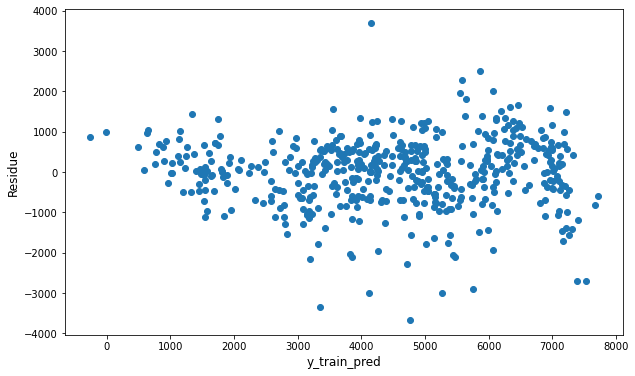

In [71]:
res= (y_train - y_train_pred)
plt.figure(figsize=(10,6))
plt.scatter(y_train_pred,res)
plt.xlabel("y_train_pred",fontsize=12)
plt.ylabel("Residue",fontsize=12)
    

###### Observation
The residuals are not showing any patterns with the dependent variable.Thus satisfying the assumption of residues

##### Examining for relationship between the residuals with the independent variables 

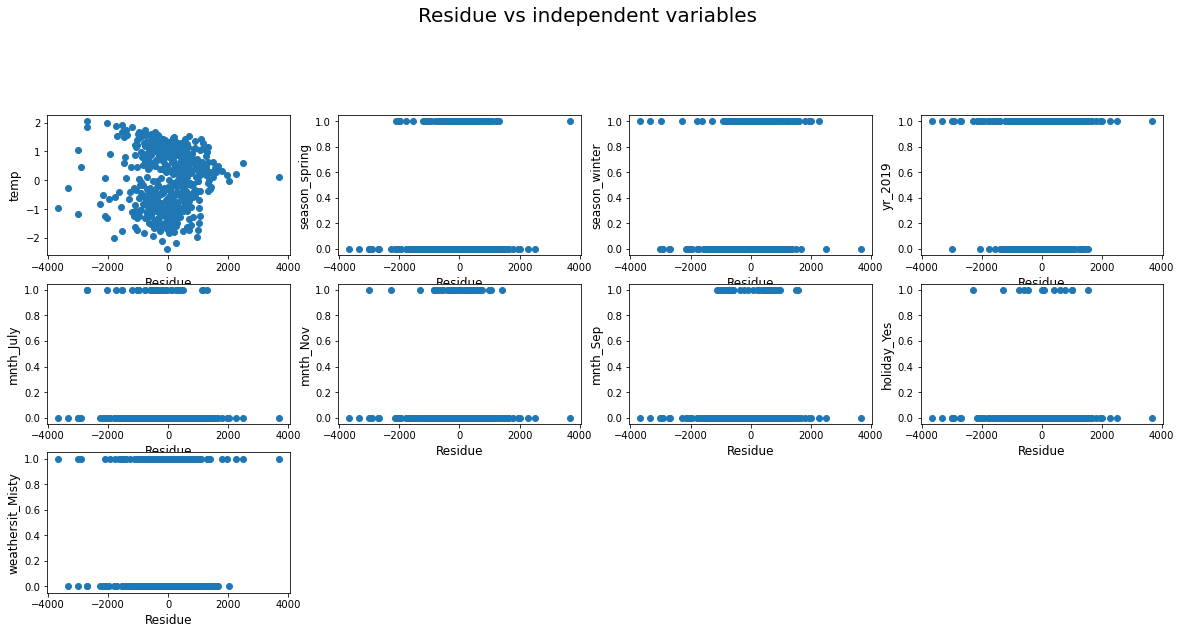

In [72]:
#### res= (y_train - y_train_pred)
plt.figure(figsize=(20,15))

ind_var_list = ['temp', 'season_spring', 'season_winter', 'yr_2019', 'mnth_July',
       'mnth_Nov', 'mnth_Sep', 'holiday_Yes', 'weathersit_Misty',
       'weathersit_Rainy']
for ind_var,i in zip(ind_var_list,range(1,len(ind_var_list))):
    plt.subplot(5,4,i).scatter(res,X_train[ind_var])
                 # Plot heading 
    plt.ylabel(ind_var,fontsize=12)
    plt.xlabel("Residue",fontsize=12)
plt.suptitle('Residue vs independent variables', fontsize=20);

###### Observation
The residuals are not showing any patterns with the independent variable.Thus satisfying the assumption of residues

# Step 11 Making Predictions

In [73]:
#transforming the numerical variables
num_vars= [ 'temp', 'hum', 'windspeed']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [74]:
#Separating X and y 
y_test = df_test.pop('cnt')
X_test = df_test


In [75]:
X_train_rfe4.columns

Index(['const', 'temp', 'season_spring', 'yr_2019', 'mnth_Sep', 'holiday_Yes',
       'weathersit_Misty', 'weathersit_Rainy'],
      dtype='object')

In [76]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_train_rfe4.columns
cols=['temp', 'season_spring', 'yr_2019', 'mnth_Sep', 'holiday_Yes',
       'weathersit_Misty', 'weathersit_Rainy']
X_test = X_test[cols]

# Adding a constant variable 
X_test = sm.add_constant(X_test)

In [77]:
# Making predictions
y_test_pred = lm4.predict(X_test)

# Step 12 Model Evaluation 

Text(0, 0.5, 'y_pred')

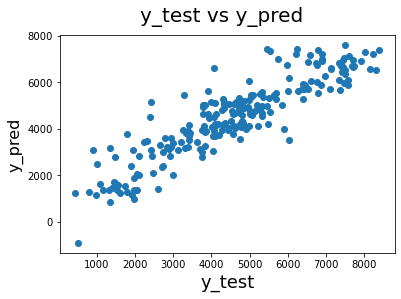

In [78]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

##### Observation
The graph shows that the prediced value of y_test and actual y_test are correlated hence demonstrating that the model is a good model.

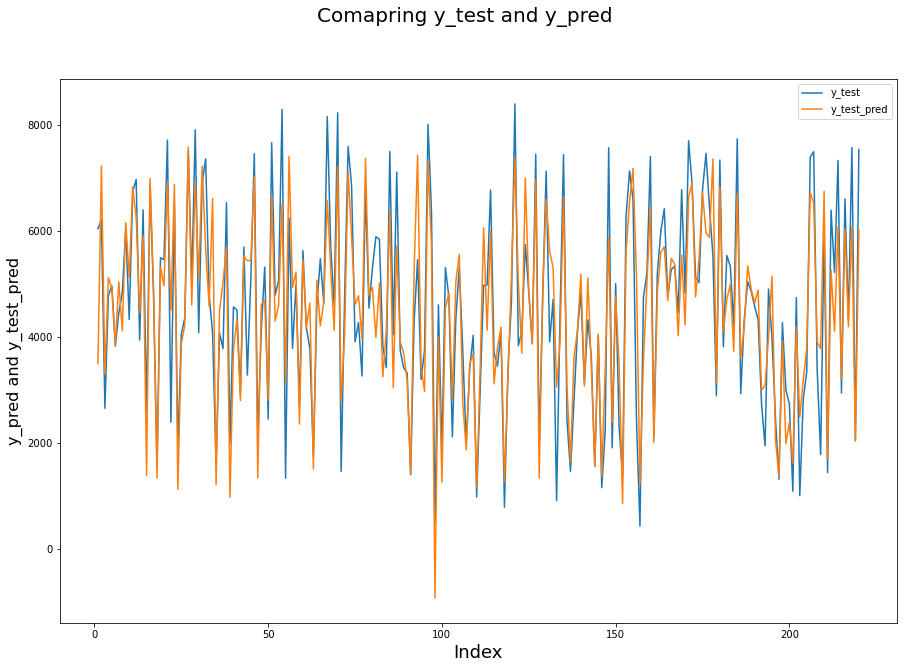

In [79]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure(figsize=(15,10))

c = [i for i in range(1,y_test.shape[0]+1,1)]
a, =plt.plot(c,y_test,label="y_test")
b, = plt.plot(c,y_test_pred,label="y_test_pred")
fig.suptitle('Comapring y_test and y_pred', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                          # X-label
plt.ylabel('y_pred and y_test_pred', fontsize=16)
plt.legend(handles=[a,b])

##### Observation
The graph shows that the prediced value of y_test and actual y_test are very close hence demonstrating that the model is a good  model.

# R2 score for test and train data

In [80]:
#r2 score of training data
r2_score(y_train, y_train_pred)

0.8102961978067424

In [81]:
# r2 score for test data
r2_score(y_test, y_test_pred)

0.8009640985538993

##### Observation
The difference between the r square scores for test and train data dont differ by more than 5% which is the norm to decide if the model is good.

In [82]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_train_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_train_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))


Mean Absolute Error: 636.2529461427567
Mean Squared Error: 720426.2102361472
Root Mean Squared Error: 848.7792470578833


# Other models tried before fianalizing the above approach

The data processing steps remain the same.

# Alternate Model1 : Rescaling the Features with MinMax scaler
The numerical features are scaled using the MinMaxScaler

#transforming the numerical variables
num_vars= ['temp', 'hum', 'windspeed']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df.head()

plt.figure(figsize=(15,15))
res=df_train.corr()
sns.heatmap(res,annot=True, cmap='YlGnBu',vmin=0.3,vmax=.8)

# Step 6: Dividing into X and Y sets for the model building

y_train = df_train.pop("cnt")

X_train=df_train


X_train.info()

# Step 7: Building a model with RFE

#creating an instance of Linear Regression module
lm=LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

#Columns not considered significant by RFE
X_train.columns[~rfe.support_]

#Columns considered significant by RFE
col = X_train.columns[rfe.support_]
col

# Step 8 Model1 Building the model using statsmodel, using the detailed statistics

#Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

#add constant to Xtrain
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Seeing the summary of our linear model
print(lm.summary())

# Step 9 Calculate the VIFs for model 1

In [83]:
<!-- vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif -->

SyntaxError: invalid syntax (<ipython-input-83-421d57d50f59>, line 1)

##### Analysis
The model seems to be the smae as the previous one the features in the final model are more easier to explain in business terms 

# Alternate Model2 : Rescaling the Features with MinMax scaler and keeping atemp instead of temp
The numerical features are scaled using the MinMaxScaler

df.head()

# Step 5: Rescaling the Features
The numerical features are scaled using the MinMaxScaler

# Step 4: Splitting the Data into Training and Testing Sets

# np.random.seed(0)
df_train,df_test =train_test_split(df, train_size = 0.7, random_state = 100)

#Creating an instance of the scaler
scaler=MinMaxScaler()


#transforming the numerical variables
num_vars= [ 'atemp', 'hum', 'windspeed']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df.head()

plt.figure(figsize=(15,15))
res=df_train.corr()
# res=res[abs(res)>0.3]
sns.heatmap(res,annot=True, cmap='YlGnBu',vmin=0.3,vmax=.8)

# Step 6: Dividing into X and Y sets for the model building

y_train = df_train.pop("cnt")

X_train=df_train


X_train.info()

# Step 7: Building a model with RFE

#creating an instance of Linear Regression module
lm=LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

#Columns not considered significant by RFE
X_train.columns[~rfe.support_]

#Columns considered significant by RFE
col = X_train.columns[rfe.support_]
col

# Step 8 Model1 Building the model using statsmodel, using the detailed statistics

#Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

#add constant to Xtrain
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Seeing the summary of our linear model
print(lm.summary())

# Step 9 Calculate the VIFs for model 1

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

##### Analysis
This model is also very simiar to the final model the temp feature is easier to measure as it is an absolute measure compared to atemp hence final model was selected. Nevertheless R-squared: is high and so is Adj. R-squared:. F value is high and Prob(F) is low which says the model is a good fit. The features season_spring and weathersit_Rainy have a high -ve coeff showing they play an imporant role in the model . Highest p-value for the features is mnth_Dec of .044 saying it may not be that important.